In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurazione visualizzazioni
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


# Configurazione Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [28]:
# from google.colab import files
# uploaded = files.upload()

In [29]:
df = pd.read_excel('confronto fatturato.xlsx', sheet_name='dati')
print(f"Righe totali: {len(df)}")
print(f"Colonne: {list(df.columns)}")
print("\nPrime righe:")
df.head()


Righe totali: 6021
Colonne: ['Codice cliente', 'Venta a-Nombre', 'Importe', 'Codigo Vendedor', 'Vendedor', 'Fecha emisión documento', 'Mese', 'Numero Mese', 'Anno']

Prime righe:


,Codice cliente,Venta a-Nombre,Importe,Codigo Vendedor,Vendedor,Fecha emisión documento,Mese,Numero Mese,Anno
0,4154,SONEPAR IBERICA SPAIN SAU (GR TARRAGONA),33385.15,29,Representante Cataluña,2022-03-11,Marzo,3,2022
1,2116,PRYSMIAN CABLES SPAIN S.A.U.,13277.70,29,Representante Cataluña,2022-01-14,Enero,1,2022
2,3186,"SYG, S.A.",9021.90,29,Representante Cataluña,2022-01-14,Enero,1,2022
3,4111,CORPORACION COOPER ELECTRIC SAC,394.50,4,Exportaciones Atex,2022-01-14,Enero,1,2022
4,4154,SONEPAR IBERICA SPAIN SAU (GR TARRAGONA),1128.58,29,Representante Cataluña,2022-01-14,Enero,1,2022


## EDA

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6021 entries, 0 to 6020
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Codice cliente           6021 non-null   int64         
 1   Venta a-Nombre           6020 non-null   object        
 2   Importe                  6021 non-null   float64       
 3   Codigo Vendedor          6021 non-null   int64         
 4   Vendedor                 6021 non-null   object        
 5   Fecha emisión documento  6021 non-null   datetime64[ns]
 6   Mese                     6021 non-null   object        
 7   Numero Mese              6021 non-null   int64         
 8   Anno                     6021 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 423.5+ KB


In [31]:
# Togli righe con problemi
df = df.dropna(subset=['Fecha emisión documento'])  # Date valide


In [32]:
# Ordina per data
df = df.sort_values('Fecha emisión documento').reset_index(drop=True)
print(f"Dopo pulizia: {len(df)} righe")
print(f"Periodo: da {df['Fecha emisión documento'].min()} a {df['Fecha emisión documento'].max()}")

Dopo pulizia: 6021 righe
Periodo: da 2022-01-03 00:00:00 a 2025-11-10 00:00:00


In [33]:
print("IMPORTE:")
print(df['Importe'].describe())

IMPORTE:
count     6021.00
mean      1762.90
std       6023.33
min          0.00
25%        161.20
50%        471.53
75%       1334.52
max     190451.62
Name: Importe, dtype: float64


In [34]:
# fatturato per anno
print("\nFATTURATO PER ANNO:")
print(df.groupby('Anno')['Importe'].sum())


FATTURATO PER ANNO:
Anno
2022   2178950.93
2023   2664148.85
2024   3058409.11
2025   2712937.90
Name: Importe, dtype: float64


In [35]:
# Numero clienti
print(f"\nClienti unici totali: {df['Codice cliente'].nunique()}")
print(f"Transazioni totali: {len(df)}")


Clienti unici totali: 312
Transazioni totali: 6021


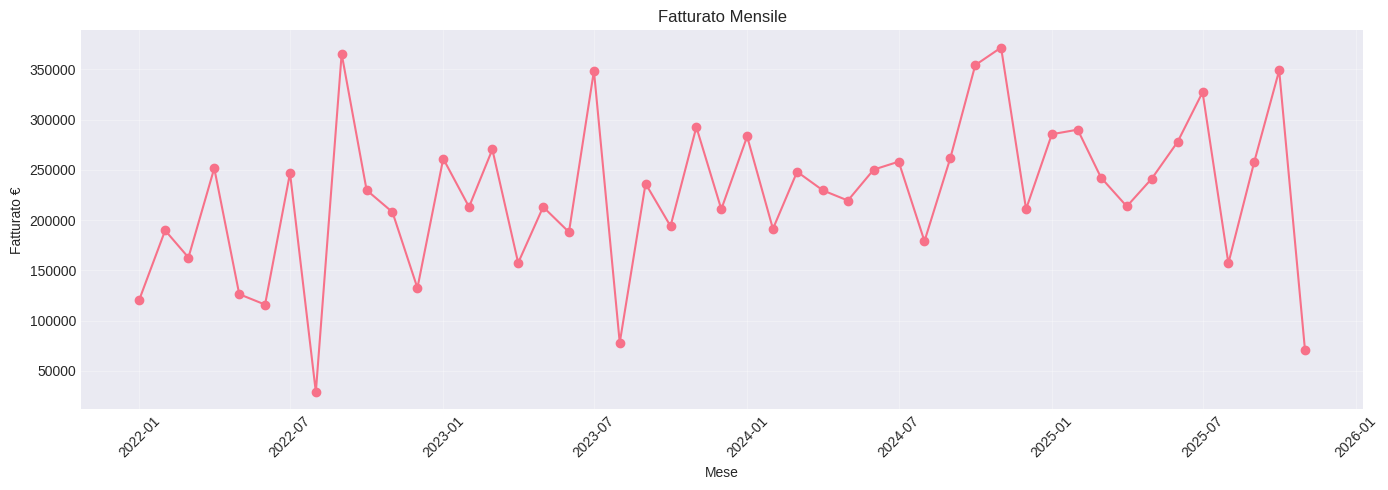

Media mensile: €225,839
Mediana mensile: €229,857


In [36]:
# Fatturato mensile
mensile = df.groupby(['Anno', 'Numero Mese'])['Importe'].sum().reset_index()
mensile['data'] = pd.to_datetime(mensile['Anno'].astype(str) + '-' + mensile['Numero Mese'].astype(str) + '-01')

plt.figure(figsize=(14, 5))
plt.plot(mensile['data'], mensile['Importe'], marker='o')
plt.title('Fatturato Mensile')
plt.xlabel('Mese')
plt.ylabel('Fatturato €')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Media mensile: €{mensile['Importe'].mean():,.0f}")
print(f"Mediana mensile: €{mensile['Importe'].median():,.0f}")

In [37]:
# Aggrega per mese
model_df = df.groupby(['Anno', 'Numero Mese']).agg({
    'Importe': 'sum',
    'Codice cliente': 'nunique',
    'Fecha emisión documento': 'count'
}).reset_index()

# Rinomina colonne
model_df.columns = ['anno', 'mese', 'fatturato', 'num_clienti', 'num_transazioni']

# Crea data
model_df['data'] = pd.to_datetime(model_df['anno'].astype(str) + '-' + model_df['mese'].astype(str) + '-01')

# Ordina
model_df = model_df.sort_values('data').reset_index(drop=True)

print(f"Dataset mensile: {len(model_df)} mesi")
model_df.head(10)

Dataset mensile: 47 mesi


,anno,mese,fatturato,num_clienti,num_transazioni,data
0,2022,1,120899.05,46,100,2022-01-01
1,2022,2,189769.84,55,130,2022-02-01
2,2022,3,162783.06,52,134,2022-03-01
3,2022,4,251698.64,53,107,2022-04-01
4,2022,5,126289.63,57,126,2022-05-01
5,2022,6,115917.87,46,102,2022-06-01
6,2022,7,246838.66,49,115,2022-07-01
7,2022,8,28837.31,15,27,2022-08-01
8,2022,9,365616.57,56,142,2022-09-01
9,2022,10,229857.20,53,135,2022-10-01


## Feature Engineering

In [38]:
# trimestri
model_df['trimestre'] = model_df['data'].dt.quarter
# Fatturato mesi precedente
model_df['fatturato_mese_prima'] = model_df['fatturato'].shift(1)
model_df['fatturato_2_mesi_prima'] = model_df['fatturato'].shift(2)
model_df['fatturato_3_mesi_prima'] = model_df['fatturato'].shift(3)
# Crescita rispetto mese precedente
model_df['crescita_perc'] = model_df['fatturato'].pct_change() * 100
# Fatturato per cliente
model_df['fatturato_per_cliente'] = model_df['fatturato'] / model_df['num_clienti']

In [39]:
# Rimuovi prime righe con NaN
model_df_clean = model_df.dropna().reset_index(drop=True)
print(f"Dataset pulito: {len(model_df_clean)} mesi")
print(f"\nColonne create:")
print(list(model_df_clean.columns))

Dataset pulito: 44 mesi

Colonne create:
['anno', 'mese', 'fatturato', 'num_clienti', 'num_transazioni', 'data', 'trimestre', 'fatturato_mese_prima', 'fatturato_2_mesi_prima', 'fatturato_3_mesi_prima', 'crescita_perc', 'fatturato_per_cliente']


## correlations

fatturato                 1.00
fatturato_per_cliente     0.84
num_transazioni           0.72
num_clienti               0.60
crescita_perc             0.43
anno                      0.28
data                      0.27
fatturato_2_mesi_prima    0.15
fatturato_3_mesi_prima    0.04
trimestre                -0.01
mese                     -0.06
fatturato_mese_prima     -0.24
Name: fatturato, dtype: float64


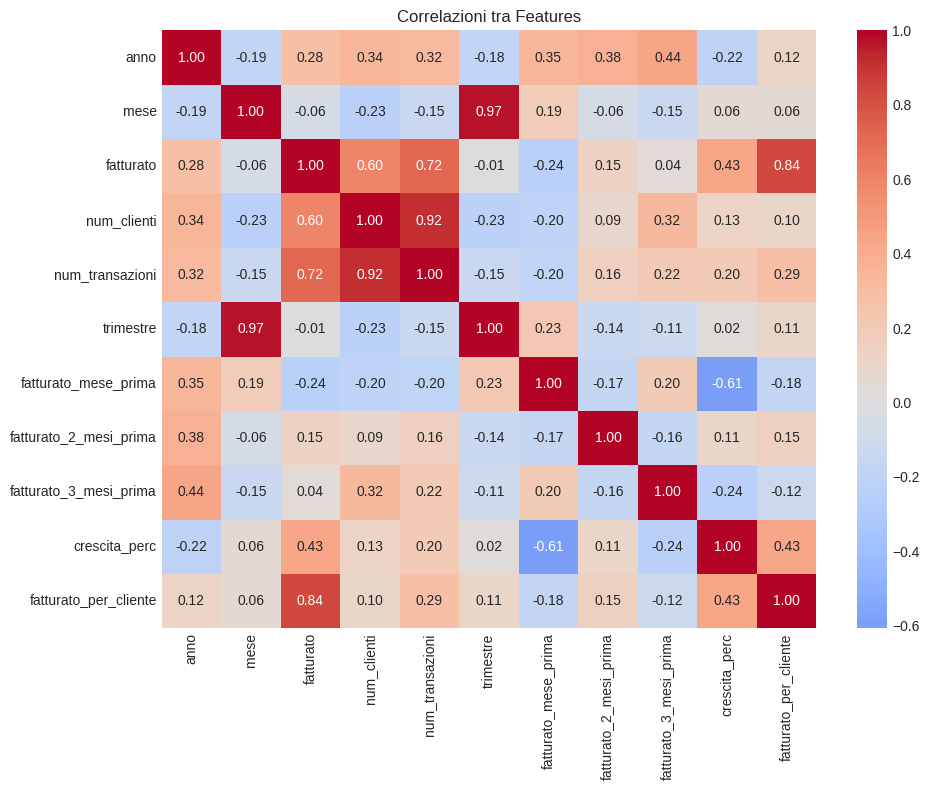

In [40]:
# Correlazioni
correlazioni = model_df_clean.corr()['fatturato'].sort_values(ascending=False)
print(correlazioni)
plt.figure(figsize=(10, 8))
features_num = model_df_clean.select_dtypes(include=[np.number]).columns
sns.heatmap(model_df_clean[features_num].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlazioni tra Features')
plt.tight_layout()
plt.show()

In [41]:
# target = model_df_clean['fatturato']
# X = model_df_clean[['mese', 'num_clienti', 'num_transazioni', 'trimestre','fatturato_mese_prima', 'fatturato_2_mesi_prima','fatturato_3_mesi_prima', 'fatturato_per_cliente']]
# y = model_df_clean['fatturato']

In [42]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.3,
#                                                     random_state=667,
#                                                    )

In [43]:
# Split: ultimi 6 mesi per test
split_point = len(model_df_clean) - 6

train = model_df_clean[:split_point].copy()
test = model_df_clean[split_point:].copy()

print(f"Train: {len(train)} mesi (fino a {train['data'].max().strftime('%Y-%m')})")
print(f"Test: {len(test)} mesi (da {test['data'].min().strftime('%Y-%m')} a {test['data'].max().strftime('%Y-%m')})")

# Features da usare
features = ['mese', 'trimestre', 'num_clienti', 'num_transazioni',
            'fatturato_mese_prima', 'fatturato_2_mesi_prima', 'fatturato_3_mesi_prima','fatturato_per_cliente']

X_train = train[features]
y_train = train['fatturato']

X_test = test[features]
y_test = test['fatturato']

print(f"\nFeatures usate: {len(features)}")
for i, feat in enumerate(features, 1):
    print(f"  {i}. {feat}")

Train: 38 mesi (fino a 2025-05)
Test: 6 mesi (da 2025-06 a 2025-11)

Features usate: 8
  1. mese
  2. trimestre
  3. num_clienti
  4. num_transazioni
  5. fatturato_mese_prima
  6. fatturato_2_mesi_prima
  7. fatturato_3_mesi_prima
  8. fatturato_per_cliente


In [44]:
!pip install xgboost lightgbm catboost scikit-learn -q


## Model Development

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error


In [46]:
# Funzione per valutare ogni modello
def valuta_modello(nome, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(root_mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{nome}:")
    print(f"  MAE:  €{mae:,.0f}")
    print(f"  RMSE: €{rmse:,.0f}")
    print(f"  R²:   {r2:.3f}")
    print(f"  MAPE: {mape:.2f}%")

    return {'nome': nome, 'mae': mae, 'rmse': rmse, 'r2': r2, 'mape': mape}

# Lista risultati
risultati = []


# 1. Linear Regression
print("\n[1/5] Training Linear Regression")
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
risultati.append(valuta_modello("Linear Regression", y_test, pred_lr))

# 2. Random Forest
print("\n[2/5] Training Random Forest")
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
risultati.append(valuta_modello("Random Forest", y_test, pred_rf))

# 3. XGBoost
print("\n[3/5] Training XGBoost")
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
risultati.append(valuta_modello("XGBoost", y_test, pred_xgb))

# 4. LightGBM
print("\n[4/5] Training LightGBM")
lgb = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1)
lgb.fit(X_train, y_train)
pred_lgb = lgb.predict(X_test)
risultati.append(valuta_modello("LightGBM", y_test, pred_lgb))

# 5. CatBoost
print("\n[5/5] Training CatBoost")
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=0)
cat.fit(X_train, y_train)
pred_cat = cat.predict(X_test)
risultati.append(valuta_modello("CatBoost", y_test, pred_cat))





[1/5] Training Linear Regression

Linear Regression:
  MAE:  €19,819
  RMSE: €144
  R²:   0.955
  MAPE: 10.40%

[2/5] Training Random Forest

Random Forest:
  MAE:  €44,915
  RMSE: €230
  R²:   0.702
  MAPE: 19.53%

[3/5] Training XGBoost

XGBoost:
  MAE:  €36,260
  RMSE: €211
  R²:   0.792
  MAPE: 14.35%

[4/5] Training LightGBM

LightGBM:
  MAE:  €87,748
  RMSE: €313
  R²:   -0.013
  MAPE: 60.53%

[5/5] Training CatBoost

CatBoost:
  MAE:  €36,439
  RMSE: €196
  R²:   0.845
  MAPE: 18.90%


In [47]:
# Confronto modelli
risultati_df = pd.DataFrame(risultati)
risultati_df = risultati_df.sort_values('r2', ascending=False)

In [48]:
risultati_df

,nome,mae,rmse,r2,mape
0,Linear Regression,19818.89,143.83,0.95,10.40
4,CatBoost,36438.77,195.77,0.84,18.90
2,XGBoost,36259.53,210.66,0.79,14.35
1,Random Forest,44915.24,230.43,0.70,19.53
3,LightGBM,87748.22,312.97,-0.01,60.53


In [49]:
# Trova il migliore
migliore_nome = risultati_df.iloc[0]['nome']
migliore_r2 = risultati_df.iloc[0]['r2']
migliore_mape = risultati_df.iloc[0]['mape']

## Comparazione modelli

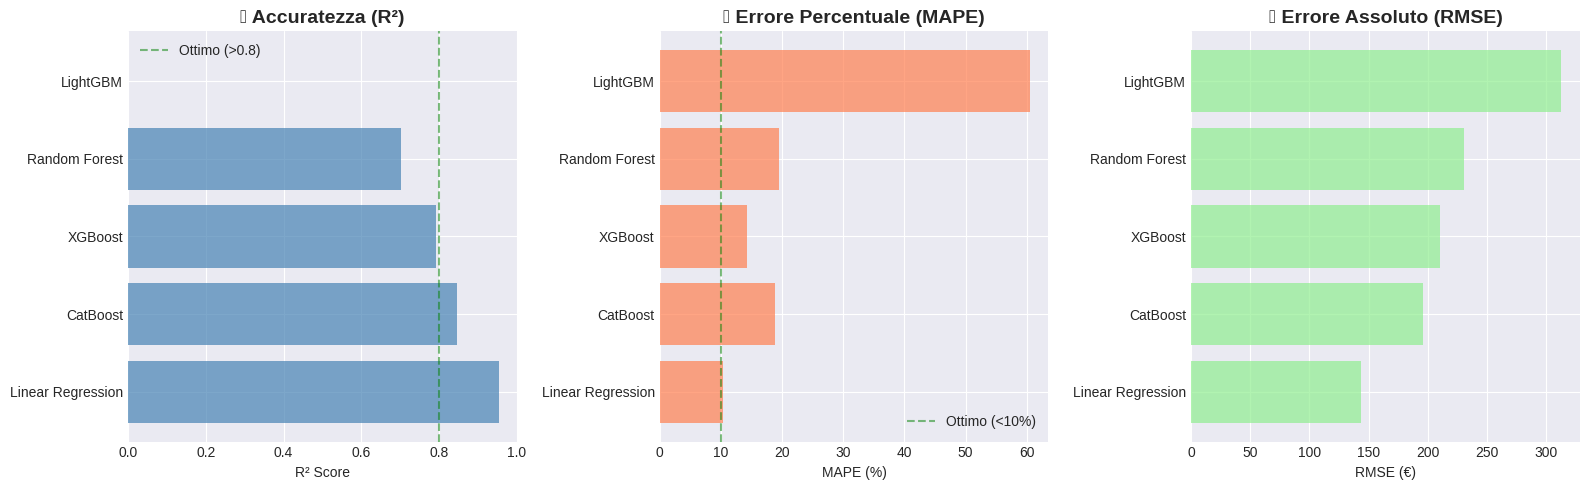

In [50]:
# Grafici comparativi
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# R² Score
axes[0].barh(risultati_df['nome'], risultati_df['r2'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('R² Score')
axes[0].set_title(' Accuratezza (R²)', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].axvline(0.8, color='green', linestyle='--', alpha=0.5, label='Ottimo (>0.8)')
axes[0].legend()

# MAPE
axes[1].barh(risultati_df['nome'], risultati_df['mape'], color='coral', alpha=0.7)
axes[1].set_xlabel('MAPE (%)')
axes[1].set_title(' Errore Percentuale (MAPE)', fontsize=14, fontweight='bold')
axes[1].axvline(10, color='green', linestyle='--', alpha=0.5, label='Ottimo (<10%)')
axes[1].legend()

# RMSE
axes[2].barh(risultati_df['nome'], risultati_df['rmse'], color='lightgreen', alpha=0.7)
axes[2].set_xlabel('RMSE (€)')
axes[2].set_title(' Errore Assoluto (RMSE)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Trovo il modello migliore

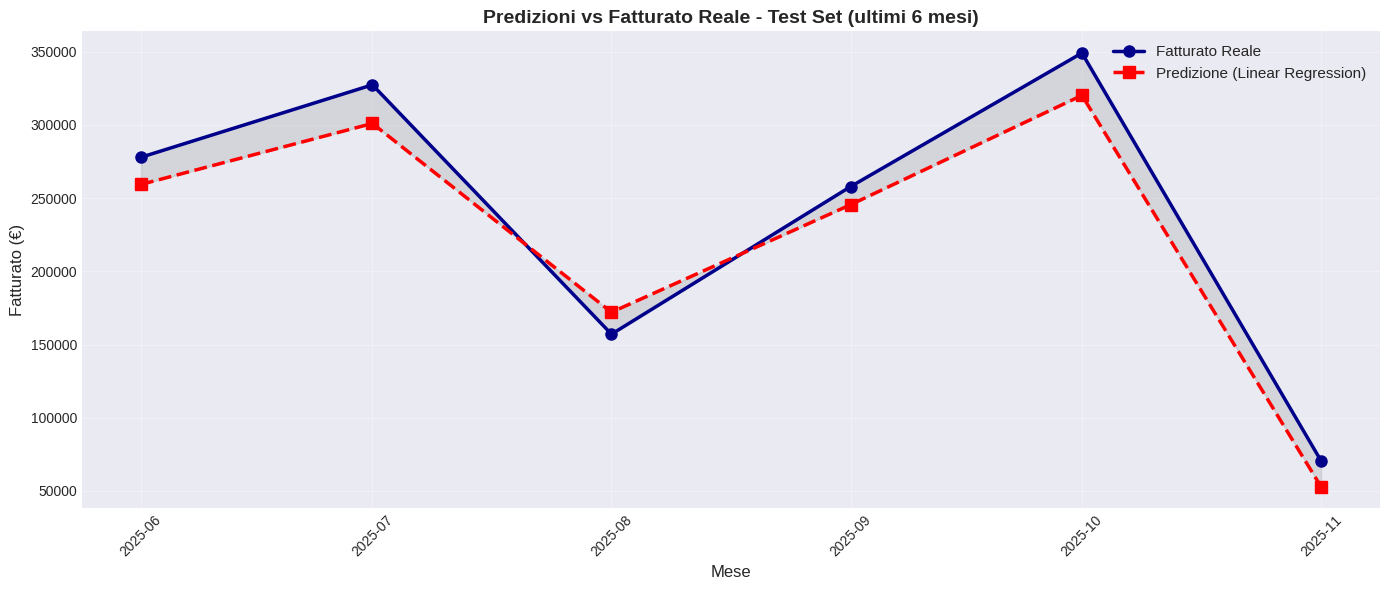


📋 DETTAGLIO PREDIZIONI MESE PER MESE:
   Mese  Fatturato Reale (€)  Predizione (€)  Differenza (€)  Errore %
2025-06            277904.72       259342.97        18561.75      6.68
2025-07            327345.23       300964.63        26380.60      8.06
2025-08            157077.21       172041.24       -14964.03      9.53
2025-09            257841.28       245462.47        12378.81      4.80
2025-10            349070.50       320139.78        28930.72      8.29
2025-11             70641.81        52944.35        17697.46     25.05

📊 STATISTICHE ERRORE:
   Errore medio: €14,831
   Errore massimo: €28,931
   Errore % medio: 10.40%


In [51]:
# Identifica automaticamente il modello migliore
modelli_pred = {
    'Linear Regression': pred_lr,
    'Random Forest': pred_rf,
    'XGBoost': pred_xgb,
    'LightGBM': pred_lgb,
    'CatBoost': pred_cat
}

# Usa predizioni del modello migliore
pred_migliore = modelli_pred[migliore_nome]

# Grafico predizioni vs reale
plt.figure(figsize=(14, 6))
plt.plot(test['data'], y_test, marker='o', label='Fatturato Reale',
         linewidth=2.5, markersize=8, color='darkblue')
plt.plot(test['data'], pred_migliore, marker='s', label=f'Predizione ({migliore_nome})',
         linewidth=2.5, markersize=8, linestyle='--', color='red')
plt.fill_between(test['data'], y_test, pred_migliore, alpha=0.2, color='gray')
plt.title(f'Predizioni vs Fatturato Reale - Test Set (ultimi 6 mesi)',
          fontsize=14, fontweight='bold')
plt.xlabel('Mese', fontsize=12)
plt.ylabel('Fatturato (€)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tabella dettagliata
confronto = pd.DataFrame({
    'Mese': test['data'].dt.strftime('%Y-%m'),
    'Fatturato Reale (€)': y_test.values,
    'Predizione (€)': pred_migliore,
    'Differenza (€)': y_test.values - pred_migliore,
    'Errore %': np.abs((y_test.values - pred_migliore) / y_test.values * 100)
})

print("\n DETTAGLIO PREDIZIONI MESE PER MESE:")
print("="*80)
print(confronto.to_string(index=False))

# Statistiche errori
print(f"\n STATISTICHE ERRORE:")
print(f"   Errore medio: €{confronto['Differenza (€)'].mean():,.0f}")
print(f"   Errore massimo: €{confronto['Differenza (€)'].abs().max():,.0f}")
print(f"   Errore % medio: {confronto['Errore %'].mean():.2f}%")


🔍 IMPORTANZA FEATURES (Linear Regression):
               Feature  Importance
           num_clienti     2137.31
             trimestre      530.56
       num_transazioni      390.08
                  mese      223.11
 fatturato_per_cliente       48.45
fatturato_3_mesi_prima        0.03
fatturato_2_mesi_prima        0.03
  fatturato_mese_prima        0.01


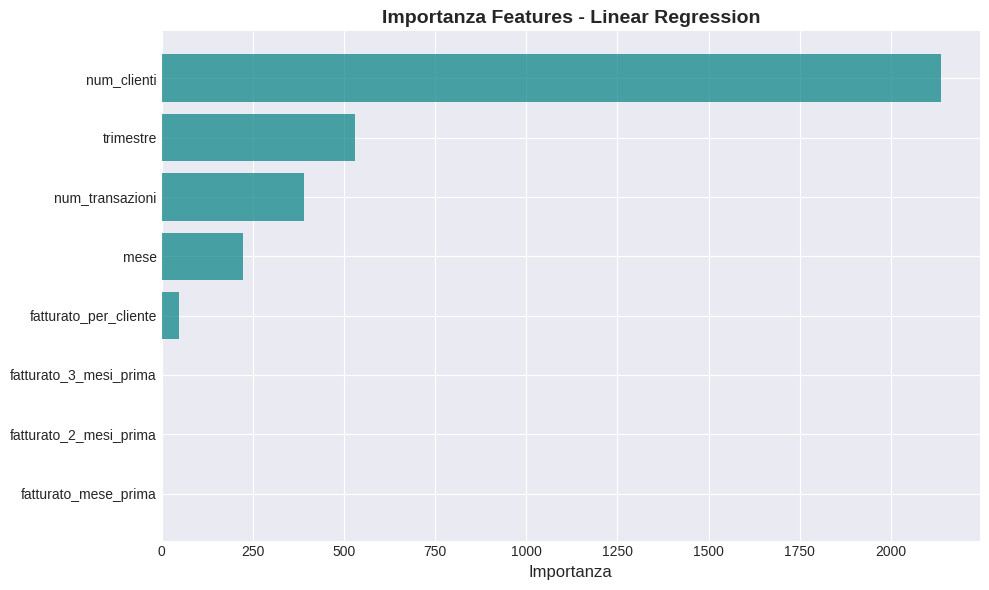

In [52]:
# Feature importance per il modello migliore
if migliore_nome == 'Linear Regression':
    importances = np.abs(lr.coef_)
elif migliore_nome == 'Random Forest':
    importances = rf.feature_importances_
elif migliore_nome == 'XGBoost':
    importances = xgb.feature_importances_
elif migliore_nome == 'LightGBM':
    importances = lgb.feature_importances_
elif migliore_nome == 'CatBoost':
    importances = cat.feature_importances_

# Crea dataframe
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(f"\n IMPORTANZA FEATURES ({migliore_nome}):")
print("="*60)
print(feat_importance.to_string(index=False))

# Grafico
plt.figure(figsize=(10, 6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='teal', alpha=0.7)
plt.xlabel('Importanza', fontsize=12)
plt.title(f'Importanza Features - {migliore_nome}', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# print(f"\n INSIGHT:")
# print(f"   Feature più importante: {feat_importance.iloc[0]['Feature']}")
# print(f"   Le top 3 features spiegano il modello!")

##Salvataggio modello

In [53]:
# Salvo il modello migliore

import pickle


if migliore_nome == 'Linear Regression':
    modello_finale = lr
elif migliore_nome == 'Random Forest':
    modello_finale = rf
elif migliore_nome == 'XGBoost':
    modello_finale = xgb
elif migliore_nome == 'LightGBM':
    modello_finale = lgb
elif migliore_nome == 'CatBoost':
    modello_finale = cat

# Salvo su file
with open('modello_forecast.pkl', 'wb') as f:
    pickle.dump(modello_finale, f)

# Salvo le features usate
with open('features_usate.pkl', 'wb') as f:
    pickle.dump(features, f)

print("✅ Modello salvato come 'modello_forecast.pkl'")
print("✅ Features salvate come 'features_usate.pkl'")

# Scarico i file
from google.colab import files
files.download('modello_forecast.pkl')
files.download('features_usate.pkl')



✅ Modello salvato come 'modello_forecast.pkl'
✅ Features salvate come 'features_usate.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Esempio di predizione con dati reali

In [54]:
import pickle
import pandas as pd

# Carica il modello
with open('modello_forecast.pkl', 'rb') as f:
    modello = pickle.load(f)

# Carica le features
with open('features_usate.pkl', 'rb') as f:
    features = pickle.load(f)


# Esempio: predici un mese selezionato
nuovo_mese = pd.DataFrame({
    'mese': [10],
    'trimestre': [4],
    'num_clienti': [199],  # I tuoi valori reali
    'num_transazioni': [169],
    'fatturato_mese_prima': [257000],  # Fatturato dicembre 2025
    'fatturato_2_mesi_prima': [157000],  # Fatturato novembre 2025
    'fatturato_3_mesi_prima': [327000],  # Fatturato ottobre 2025
    'fatturato_per_cliente': [1753]
})

predizione = modello.predict(nuovo_mese)
print(f"\n Predizione del mese selezionato: €{predizione[0]:,.0f}")

✅ Modello caricato!
Features richieste: ['mese', 'trimestre', 'num_clienti', 'num_transazioni', 'fatturato_mese_prima', 'fatturato_2_mesi_prima', 'fatturato_3_mesi_prima', 'fatturato_per_cliente']

 Predizione del mese selezionato: €433,121
